### Description

This project contains following sub-folders and scripts:
- analysis, that contains functions for ANN analysis,
- generated/models, where you should paste your downloaded states of the MLP and CNN networks for specific datasets,
- generated/tsne, where t-sne arrays will be saved
- network/constants.py, where you should specify paths to folders described above,
- network/data_loader.py, which define helper loader methods,
- network/network.py, which defines the simple networks architecture

Paper attached to lab materials is an overview of what we will do in this assignment.

In [1]:
from analysis.network_analysis import *

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

2024-04-08 08:12:16.160427: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 08:12:16.163497: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 08:12:16.207962: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 08:12:17.012327: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## INTER-LAYER EVOLUTION

The bundled image summarizes a sequence of `N` projections, one per hidden layer, shown as thumbnails. For MLP `N=4`, and for CNN `N=2`, Trail hues encode classes, and edge brightness encodes layer number (depth). Thus, the brightness gradient shows how activation data “flow” through the four network layers. The same idea, but slightly modified, can be employed to visualize "inter-epoch" evolution.

TODO: Use `show_seq_projections` function to calculate points and targets for `N` layers of mnist_mlp model. Use `inter_layer_evolution()` and `show_trace()` for plotting the actual evolution between layers.

IMPORTANT: You need to implement minor detail in `show_seq_projections`

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fc99517ba30>
Traceback (most recent call last):
  File "/home/przemek/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/przemek/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/przemek/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/przemek/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


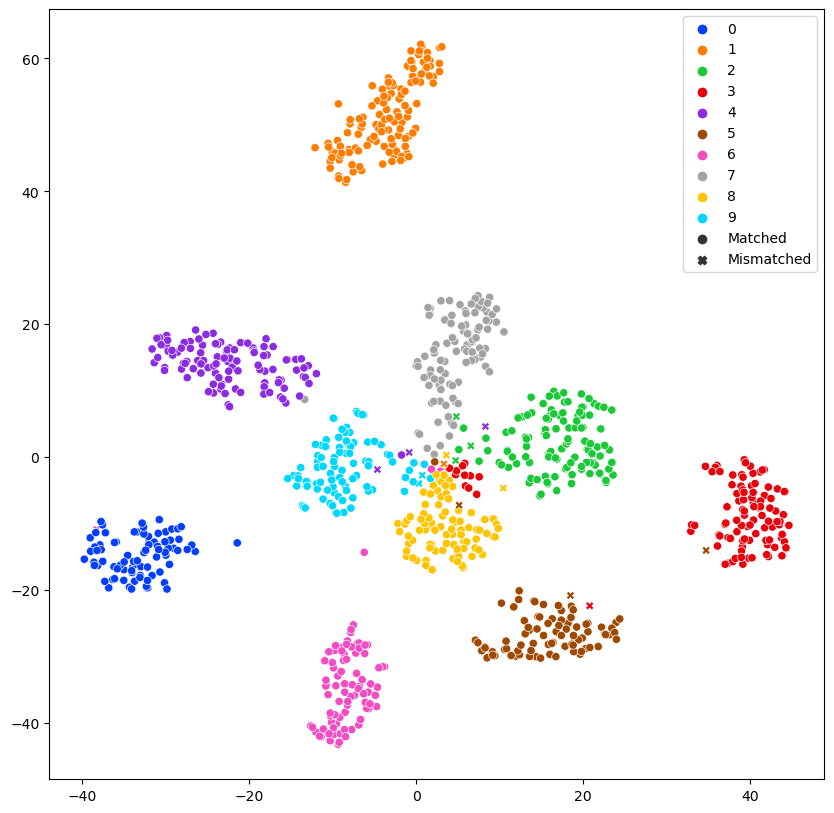

In [3]:
import tensorflow as tf
import keras
transformed_points, targets = show_seq_projections(DataType.MNIST, "mnist_mlp", 1, 100, 1000)

TODO: Please repeat the previous task for `mnist_cnn` and compare the two. Additionally, using the provided article, try to determine the meaning behind the results.

## INTER-EPOCH EVOLUTION
TODO: To complete this task, start by obtaining points and targets after hidden layers using the `get_all_activations` and `process_activations` functions. Then, use analogous functions for generating the inter-epoch evolution plot and trace. Finally, perform this task for both the `mnist_mlp` and `mnist_cnn` networks.


## PROJECTION COMPARISION

This exercise shows the neuron projection for the last CNN/MLP hidden layer activations, after training. Ignoring the colors for a moment, we see no clear pattern in the neuron projection, except for some ill-defined visual clusters. We next color each point (neuron) based on its ability to discriminate between specified class (here we define class 0) and all other classes, computed by a standard feature selection technique, based on extremely randomized trees.

TODO: Utilize the `compare_projections` method to generate a projection for both `mnist_mlp` and `mnist_cnn`, focusing on different labels (e.g., 0 and 5). IMPORTANT: Few things in `compare_projections` needs to be implemented.

What observations can be made?

## DISCRIMINATIVE NEURON MAP

For discriminative neuron map for the test subsets we use last hidden layer activations, after training. The presence of compact visual clusters shows how the entire set of neurons can be (almost) partitioned into groups with related discriminative roles (specializations),
even though the neuron projection is created without any class information. The activation and neuron projections can be combined to elucidate the role of particular neurons.

TODO: Utilize the `compare_discriminative_map` method to generate a discriminative neuron maps for both `mnist_mlp` and `mnist_cnn`. What observations can be made?

## Homework
Repeat the analysis for the network parameters of `cifar_mlp` and `cifar_cnn`.